# 4.7. Deriving New Variables

## This script contains the following:
### 1. Import Libraries and Data
### 2. Exercise Walkthrough
### 3. Task 4.7

## 1. Importing Libraries and Data

### Libraries

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Data

In [2]:
# Create a path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Acheivement 4\InstaCart_Basket_Analysis_10_01_2022'

In [3]:
# Import data: merged orders and products
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02_Data', '02_Prepared_Data', 'orders_products_merged.pkl'))

In [4]:
df = df_ords_prods_merged[:1000000]

In [5]:
df.shape

(1000000, 13)

## 2. Exercise Walkthrough

### If-Statements

In [6]:
#Define price_lable function
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range product'
  else: return 'Not enough data'

In [7]:
# Apply new price_lable function
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\MDEVIL~1\AppData\Local\Temp/ipykernel_10448/3595931481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [8]:
df['price_range'].value_counts()

Mid-range product     652638
Low-range product     338018
High range product      9344
Name: price_range, dtype: int64

In [9]:
df['prices'].max()

24.5

### If-Statement with loc. function

In [10]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\M de Villiers\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\M de Villiers\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [12]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [13]:
df['price_range_loc'].value_counts()

Mid-range product     652638
Low-range product     338018
High-range product      9344
Name: price_range_loc, dtype: int64

In [14]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range Product'

In [15]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range Product' 

In [16]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range Product'

In [17]:
df_ords_prods_merged['price_range_loc'].value_counts()

Mid-range Product     21860860
Low-range Product     10126321
High-range Product      417678
Name: price_range_loc, dtype: int64

Text(0, 0.5, 'Number of Products')

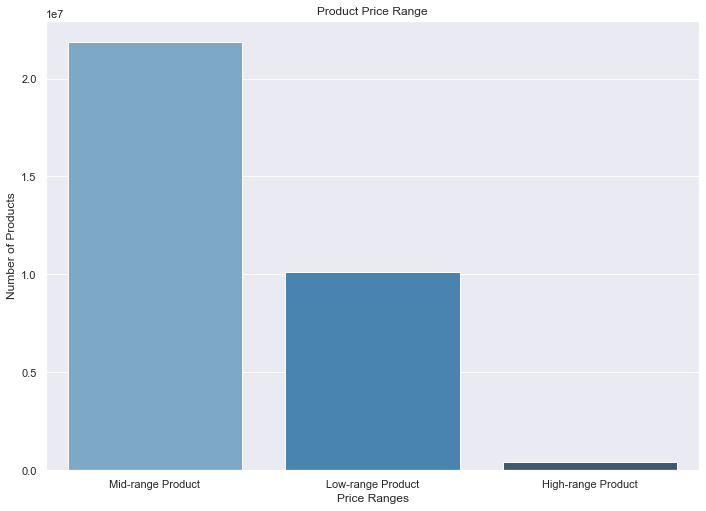

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
price_range = sns.countplot(x='price_range_loc', data = df_ords_prods_merged, palette = 'Blues_d')
price_range.set_title('Product Price Range')
price_range.set_xlabel('Price Ranges')
price_range.set_ylabel('Number of Products')

In [44]:
price_range.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'price_range.png'))

### If-Statements with For-Loops

In [18]:
# Check names of the columns
df_ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range Product
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range Product
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range Product
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,0.0,10,0,Mid-range Product
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range Product


In [19]:
# Check frequency of orders for each day
df_ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [20]:
# Run a For-Loop
result = []

for value in df_ords_prods_merged["order_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [21]:
result

['Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Least busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Bus

In [22]:
# Create new column/variable for for-loop result
df_ords_prods_merged['busiest_day'] = result

In [23]:
df_ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

## Task 4.7

### Question 2 & 3

In [24]:
# Run a For-Loop of two busiest days, two least busy days and regularly busy days
result = []

for value in df_ords_prods_merged["order_day_of_week"]:
  if value <= 1:
    result.append("Busiest days")
  elif value > 2 and value < 5:
    result.append("Least busy days")
  else:
    result.append("Regularly busy")

In [25]:
# Check values
result

['Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Least busy days',
 'Least busy days',
 'Busiest days',
 'Regularly busy',
 'Least busy days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Least busy days',
 'Least busy days',
 'Regularly busy',
 'Least busy days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Least busy days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',


In [26]:
# Create new column
df_ords_prods_merged['busiest_day'] = result

In [27]:
# Check value counts of new column
df_ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: busiest_day, dtype: int64

### Question 4 & 5

In [28]:
# Check frequency of order_hour_of_day
df_ords_prods_merged['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [29]:
# Run a For-Loop
results = []

for value in df_ords_prods_merged["order_hour_of_day"]:
  if value >= 9 and value <= 16:
    results.append("Most Orders")
  elif value >= 0 and value <= 6 or value == 23:
    results.append("Fewest Orders")
  else:
    results.append("Average Orders")

In [30]:
# Create new column
df_ords_prods_merged['busiest_period_of_day'] = results

In [31]:
# Check results
results

['Most Orders',
 'Average Orders',
 'Average Orders',
 'Most Orders',
 'Average Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Average Orders',
 'Fewest Orders',
 'Average Orders',
 'Fewest Orders',
 'Fewest Orders',
 'Fewest Orders',
 'Fewest Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Average Orders',
 'Average Orders',
 'Average Orders',
 'Average Orders',
 'Average Orders',
 'Average Orders',
 'Fewest Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Most Orders',
 'Average Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Most Orders',
 'Average Orders',
 'Average Orders',
 'Most Orders',
 'Most Ord

In [32]:
# Check value counts (frequency) of new column
df_ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most Orders       21118071
Average Orders     9997651
Fewest Orders      1289137
Name: busiest_period_of_day, dtype: int64

### Question 6 & 7

In [33]:
# Export new df
df_ords_prods_merged.to_pickle(os.path.join(path, '02_Data','02_Prepared_Data', 'orders_products_merged_new.pkl'))